# Basketball Player Hunting 🏀

In this project, as a basket team manager we are asked to recruit new player based on criterias as follow:
- Age <= 25 years old,
- Height >= 180 cm,
- Weight <= 90 kg,
- Average points scored >= 6,
- Average rebounds grabbed >= 3

We are provided 1 dataset consist of complete data of National Basketball Player. Using this dataset, we are asked to create a machine learning model to classify Indonesia's young players whether they are worth to be recruited into the team or not.

#### List of Indonesia's young basketball players that need to be classified:

Name | Club | Country | Age | Height | Weight | Avg Points | Avg Rebounds 
--|--|--|--|--|--|--|--
Andakara Prastawa Dyaksa | Pelita Jaya Bakrie | <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_Indonesia.svg/35px-Flag_of_Indonesia.svg.png' alt='lintang' style='height:13px; width:18px'/> Indonesia | 24 | 190 | 90 | 7 | 6
Reggie Mononimbar | Pelita Jaya Bakrie | <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_Indonesia.svg/35px-Flag_of_Indonesia.svg.png' alt='lintang' style='height:13px; width:18px'/> Indonesia | 21 | 185 | 86 | 6 | 3
Hardianus Lakudu | Satria Muda Pertamina Jakarta | <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_Indonesia.svg/35px-Flag_of_Indonesia.svg.png' alt='lintang' style='height:13px; width:18px'/> Indonesia | 23 | 178 | 83 | 10 | 3
Kevin Yonas Sitorus | Satria Muda Pertamina Jakarta | <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_Indonesia.svg/35px-Flag_of_Indonesia.svg.png' alt='lintang' style='height:13px; width:18px'/> Indonesia | 26 | 185 | 75 | 11 | 4
Arki Dikania Wisnu | Satria Muda Pertamina Jakarta | <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_Indonesia.svg/35px-Flag_of_Indonesia.svg.png' alt='lintang' style='height:13px; width:18px'/> Indonesia | 20 | 183 | 80 | 5 | 2
Laurentius Steven Oei | Satria Muda Pertamina Jakarta | <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_Indonesia.svg/35px-Flag_of_Indonesia.svg.png' alt='lintang' style='height:13px; width:18px'/> Indonesia | 21 | 191 | 85 | 4 | 10
Mei Joni | Stapac | <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_Indonesia.svg/35px-Flag_of_Indonesia.svg.png' alt='lintang' style='height:13px; width:18px'/> Indonesia | 25 | 188 | 90 | 7 | 5
Vincent Rivaldi Kosasih | Stapac | <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_Indonesia.svg/35px-Flag_of_Indonesia.svg.png' alt='lintang' style='height:13px; width:18px'/> Indonesia | 23 | 179 | 87 | 1 | 2
Hardian Wicaksono | Pacific Caesar Surabaya | <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_Indonesia.svg/35px-Flag_of_Indonesia.svg.png' alt='lintang' style='height:13px; width:18px'/> Indonesia | 21 | 177 | 80 | 9 | 8
Brandon Jawato | Louvre Surabaya | <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_Indonesia.svg/35px-Flag_of_Indonesia.svg.png' alt='lintang' style='height:13px; width:18px'/> Indonesia | 24 | 182 | 85 | 6 | 5

__Minimum requirements for completing this project:__

- File created in __Jupyter Notebook (.ipynb)__.
- Download the dataset [NBA players](https://www.kaggle.com/justinas/nba-players-data). Clean the data, Do __standardization__ & split into __82%__ training set & __18%__ testing set.
- Create __3 machine learning model__ for classification (free model choice), do __hyperparameter tuning__ to determine the best parameter for each model.
- Use the best model parameters to do prediction in testing data. Calculate __evaluation metrics__ for each model. Required evaluation metrics: __balanced accuracy__, __precision__, __recall__, __F1 score__ & __ROC AUC score__.
- Compare the result of each model and use the best model to classify Indonesian player data, which one to recruit and not. Provide this result in __dataframe__.

### Loading Dataset

In [71]:
# Necessary python library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [72]:
df_original = pd.read_csv('all_seasons.csv', index_col=0)
df = df_original.copy()
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [73]:
df.shape

(11145, 21)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11145 entries, 0 to 11144
Data columns (total 21 columns):
player_name          11145 non-null object
team_abbreviation    11145 non-null object
age                  11145 non-null float64
player_height        11145 non-null float64
player_weight        11145 non-null float64
college              11145 non-null object
country              11145 non-null object
draft_year           11145 non-null object
draft_round          11145 non-null object
draft_number         11145 non-null object
gp                   11145 non-null int64
pts                  11145 non-null float64
reb                  11145 non-null float64
ast                  11145 non-null float64
net_rating           11145 non-null float64
oreb_pct             11145 non-null float64
dreb_pct             11145 non-null float64
usg_pct              11145 non-null float64
ts_pct               11145 non-null float64
ast_pct              11145 non-null float64
season              

In [75]:
df.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

### Data Cleaning

 > We will work only with features that become the criteria of recruit new player, that is: __Age, Height, Weight, Average Poit,__ and __Average Rebounds__

In [76]:
df_model = df[['player_name', 'team_abbreviation', 'age', 'player_height', 'player_weight', 'pts', 'reb']]
df_model = df_model.copy()
df_model.head()

,player_name,team_abbreviation,age,player_height,player_weight,pts,reb
0,Dennis Rodman,CHI,36.0,198.12,99.790240,5.7,16.1
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,2.3,1.5
2,Earl Cureton,TOR,39.0,205.74,95.254320,0.8,1.0
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,3.7,2.3
4,Ed Pinckney,MIA,34.0,205.74,108.862080,2.4,2.4


> Create new table that provide decision of recruiting player based on criteria wanted. We will assign value 1 to recruited player, and 0 to player that is not recruited.

In [77]:
def criteria(row):
    if row['age'] <= 25 and row['player_height'] >= 180 and row['player_weight'] <= 90 and row['pts'] >= 6 and row['reb'] >= 3:
       return 1
    else:
       return 0
 
df_model['recruit'] = df_model.apply(criteria, axis=1)
df_model

,player_name,team_abbreviation,age,player_height,player_weight,pts,reb,recruit
0,Dennis Rodman,CHI,36.0,198.12,99.790240,5.7,16.1,0
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,2.3,1.5,0
2,Earl Cureton,TOR,39.0,205.74,95.254320,0.8,1.0,0
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,3.7,2.3,0
4,Ed Pinckney,MIA,34.0,205.74,108.862080,2.4,2.4,0
...,...,...,...,...,...,...,...,...
11140,Maxi Kleber,DAL,28.0,208.28,108.862080,9.1,5.4,0
11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,1.2,0.3,0
11142,Meyers Leonard,MIA,28.0,213.36,117.933920,6.1,5.1,0
11143,Norvel Pelle,PHI,27.0,208.28,104.779752,2.1,3.0,0


In [78]:
df_model['recruit'].value_counts(normalize=True)

0    0.978914
1    0.021086
Name: recruit, dtype: float64

In [79]:
df_model['recruit'].value_counts()

0    10910
1      235
Name: recruit, dtype: int64

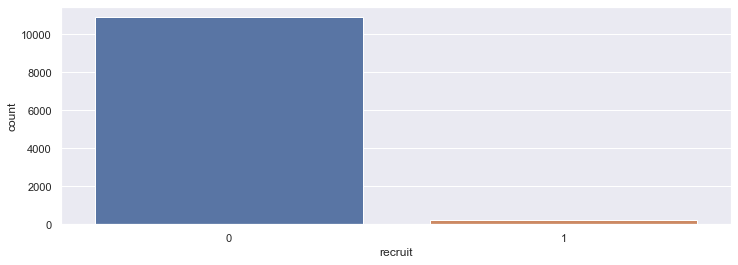

In [80]:
plt.figure()
sns.set(rc={'figure.figsize':(12, 4)})
ax = sns.countplot(x='recruit', data=df_model)

> We can see that our data has a problem with imbalance data. We will address this issue by stratifying when splitting the data for modeling. 

> Let see if we have outlier data in the dataset

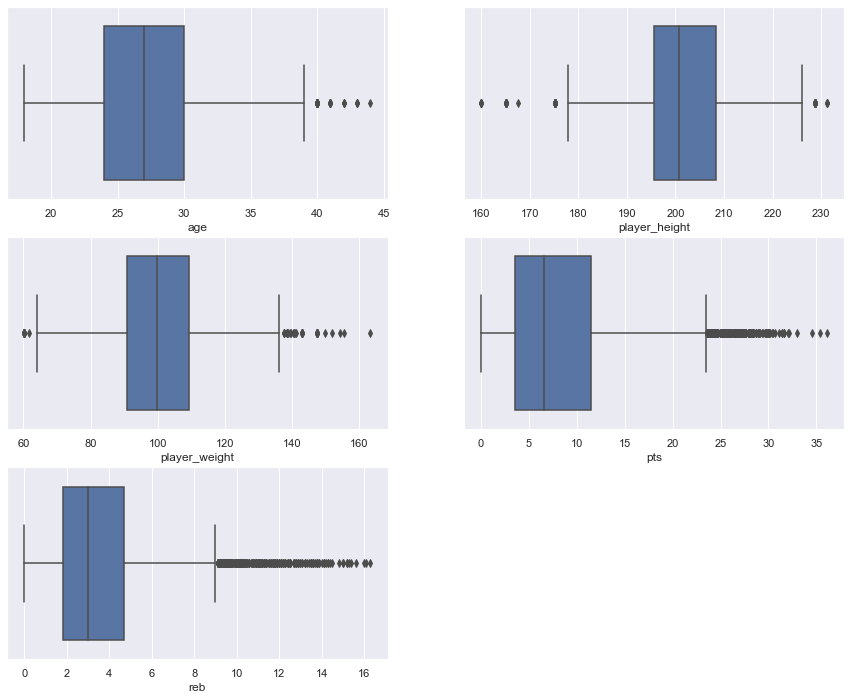

In [81]:
plt.figure(figsize=(15, 12))
plt.subplot(321)
sns.boxplot(x=df_model['age'])

plt.subplot(322)
sns.boxplot(x=df_model['player_height'])

plt.subplot(323)
sns.boxplot(x=df_model['player_weight'])

plt.subplot(324)
sns.boxplot(x=df_model['pts'])

plt.subplot(325)
sns.boxplot(x=df_model['reb'])

plt.show()

> We will drop rows that have outlier data, because it will affect our model. We will use Z-Score calculation with threshold 3 to determine outlier value.

In [82]:
z = np.abs(stats.zscore(df_model[['age', 'player_height', 'player_weight', 'pts', 'reb']]))

In [83]:
df_model_o = df_model[(z < 3).all(axis=1)]
df_model_o = df_model_o.copy()
df_model_o.head()

,player_name,team_abbreviation,age,player_height,player_weight,pts,reb,recruit
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,2.3,1.5,0
2,Earl Cureton,TOR,39.0,205.74,95.254320,0.8,1.0,0
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,3.7,2.3,0
4,Ed Pinckney,MIA,34.0,205.74,108.862080,2.4,2.4,0
5,Eddie Johnson,HOU,38.0,200.66,97.522280,8.2,2.7,0


In [84]:
df_model_o['recruit'].value_counts()

0    10586
1      232
Name: recruit, dtype: int64

In [85]:
df_model_o['recruit'].value_counts(normalize=True)

0    0.978554
1    0.021446
Name: recruit, dtype: float64

### Standardization

> We will do feature scaling using **StandardScaler()**

In [86]:
# initiate object
scaler = StandardScaler()

# Create list of columns name and remove target value name
df_model_o_col = list(df_model_o.columns)
df_model_o_col = [e for e in df_model_o_col if e not in ('player_name', 'team_abbreviation', 'recruit')]

# for each column, change data type into float, and do feature scaling
for col in df_model_o_col:
    df_model_o[col] = df_model_o[col].astype(float)
    df_model_o[[col]] = scaler.fit_transform(df_model_o[[col]])

df_model_o.head()

,player_name,team_abbreviation,age,player_height,player_weight,pts,reb,recruit
1,Dwayne Schintzius,LAC,0.200115,1.696887,1.442551,-0.998981,-0.847145,0
2,Earl Cureton,TOR,2.744272,0.563629,-0.419130,-1.270619,-1.069717,0
3,Ed O'Bannon,DAL,-0.725033,0.280315,0.027673,-0.745452,-0.491029,0
4,Ed Pinckney,MIA,1.587837,0.563629,0.697879,-0.980871,-0.446515,0
5,Eddie Johnson,HOU,2.512985,-0.003000,-0.232962,0.069462,-0.312971,0


### Splitting Data

In [87]:
X = df_model_o.drop(['player_name', 'team_abbreviation', 'recruit'], axis=1).values
y = df_model_o['recruit'].values

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42, stratify=y)

### Building Machine Learning Model

> For this project, we will use 3 classification algorithm: **Logistic Regression**, **Random Forest**, and **SVM**. We will see how this model perform and later choose the best model to be fit into our test data.

In [89]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(random_state=42)))
models.append(('SVM', SVC(random_state=42)))

In [90]:
auc_results = []
names = []

# create table to present performance result
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD']
df_results = pd.DataFrame(columns=col)

i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)    
    cv_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2)]
    i += 1
    
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD
1,Random Forest,100.00,0.00
2,SVM,99.73,0.13
0,Logistic Regression,98.31,0.40


### Hyperparameter Tuning

```Random Forest Classifier```

In [91]:
rf_classifier = RandomForestClassifier(class_weight = "balanced", random_state=42)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=kfold)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best params: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
best params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
best score: 1.0


```Logistic Regression```

In [22]:
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=42),
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=kfold)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=0.39099999999999996, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 0.39099999999999996}
best score: 0.9831251515886491


```Support Vector Machine```

In [63]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

svm_gs = GridSearchCV(SVC(random_state=42, probability=True),
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=kfold)

svm_grid = svm_gs.fit(X_train, y_train)
svm_opt = svm_grid.best_estimator_
results = svm_gs.cv_results_

print('='*20)
print("best params: " + str(svm_gs.best_estimator_))
print("best params: " + str(svm_gs.best_params_))
print('best score:', svm_gs.best_score_)
print('='*20)

best params: SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
best params: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
best score: 0.9987205918020858


### Evaluating Model with Testing Set

```Random Forest Classifier```

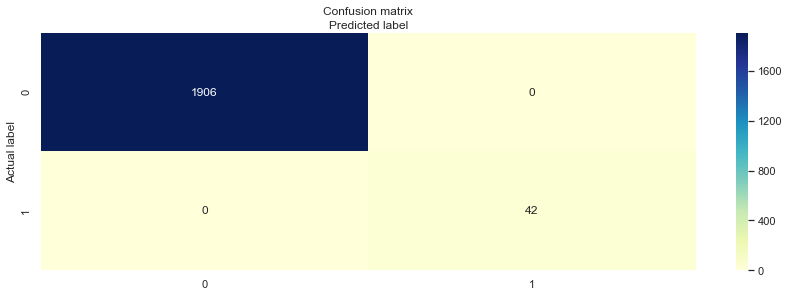

In [31]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# fix for cropped axis
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [51]:
balanced_accuracy_score(y_test, rf_opt.predict(X_test))*100

100.0

In [35]:
# Classification report for the optimised RF Regression
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1906
           1       1.00      1.00      1.00        42

    accuracy                           1.00      1948
   macro avg       1.00      1.00      1.00      1948
weighted avg       1.00      1.00      1.00      1948



In [38]:
rf_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 1.000


```Logistic Regression```

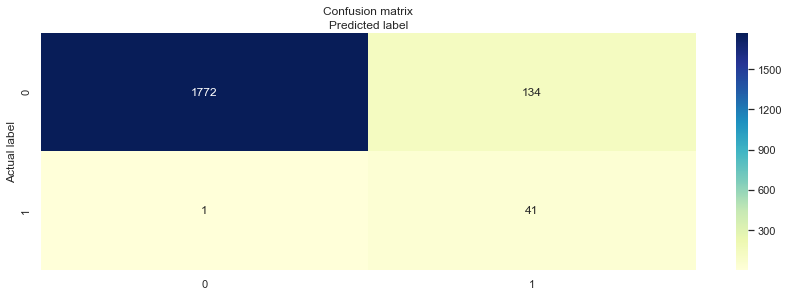

In [41]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0, 1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# fix for cropped axis
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [54]:
balanced_accuracy_score(y_test, log_opt.predict(X_test))*100

95.29430869934544

In [43]:
# Classification report for the optimised Log Regression
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1906
           1       0.23      0.98      0.38        42

    accuracy                           0.93      1948
   macro avg       0.62      0.95      0.67      1948
weighted avg       0.98      0.93      0.95      1948



In [44]:
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.987


```Support Vector Machine```

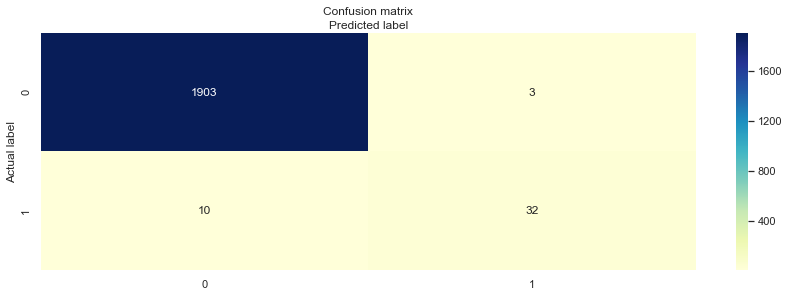

In [45]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, svm_opt.predict(X_test))
class_names=[0, 1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# fix for cropped axis
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [55]:
balanced_accuracy_score(y_test, svm_opt.predict(X_test))*100

88.01653924948782

In [60]:
# Classification report for the optimised Log Regression
svm_opt.fit(X_train, y_train)
print(classification_report(y_test, svm_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1906
           1       0.91      0.76      0.83        42

    accuracy                           0.99      1948
   macro avg       0.95      0.88      0.91      1948
weighted avg       0.99      0.99      0.99      1948



In [94]:
svm_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = svm_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
svm_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % svm_roc_auc)

AUC score: 0.998


### ROC Graph

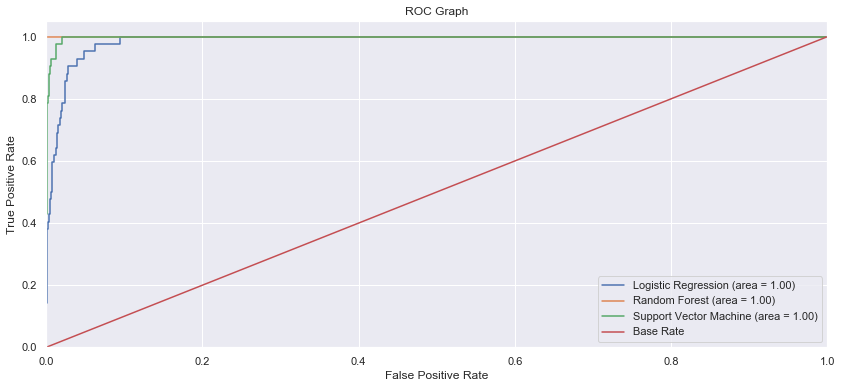

In [96]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot SVM ROC
plt.plot(svm_fpr, svm_tpr, label='Support Vector Machine (area = %0.2f)' % svm_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

> From this ROC-AUC graph, we can see that Random Forest Classifier resulting bigger AUC score, therefore we will use this model to predict Indonesia Basketball Player recruitment

### Predicting New Data

In [97]:
player_name = ['Andakara Prastawa Dyaksa', 'Reggie Mononimbar', 'Hardianus Lakudu', 'Kevin Yonas Sitorus', 'Arki Dikania Wisnu',
       'Laurentius Steven Oei', 'Mei Joni', 'Vincent Rivaldi Kosasih', 'Hardian Wicaksono', 'Brandon Jawato']
club = ['Pelita Jaya Bakrie', 'Pelita Jaya Bakrie', 'Satria Muda Pertamina Jakarta', 'Satria Muda Pertamina Jakarta',
       'Satria Muda Pertamina Jakarta', 'Satria Muda Pertamina Jakarta', 'Stapac', 'Stapac', 'Pacific Caesar Surabaya', 'Louvre Surabaya']
country = ['Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia']
age = [24, 21, 23, 26, 20, 21, 25, 23, 21, 24]
player_height = [190, 185, 178, 185, 183, 191, 188, 179, 177, 182]
player_weight = [90, 86, 83, 75, 80, 85, 90, 87, 80, 85]
pts = [7, 6, 10, 11, 5, 4, 7, 1, 9, 6]
reb = [6, 3, 3, 4, 2, 10, 5, 2, 8, 5]
col = ['player_name', 'club', 'country', 'age', 'player_height', 'player_weight', 'pts', 'reb']
df = pd.DataFrame(list(zip(player_name, club, country, age, player_height, player_weight, pts, reb)), 
               columns =col) 
df

,player_name,club,country,age,player_height,player_weight,pts,reb
0,Andakara Prastawa Dyaksa,Pelita Jaya Bakrie,Indonesia,24,190,90,7,6
1,Reggie Mononimbar,Pelita Jaya Bakrie,Indonesia,21,185,86,6,3
2,Hardianus Lakudu,Satria Muda Pertamina Jakarta,Indonesia,23,178,83,10,3
3,Kevin Yonas Sitorus,Satria Muda Pertamina Jakarta,Indonesia,26,185,75,11,4
4,Arki Dikania Wisnu,Satria Muda Pertamina Jakarta,Indonesia,20,183,80,5,2
5,Laurentius Steven Oei,Satria Muda Pertamina Jakarta,Indonesia,21,191,85,4,10
6,Mei Joni,Stapac,Indonesia,25,188,90,7,5
7,Vincent Rivaldi Kosasih,Stapac,Indonesia,23,179,87,1,2
8,Hardian Wicaksono,Pacific Caesar Surabaya,Indonesia,21,177,80,9,8
9,Brandon Jawato,Louvre Surabaya,Indonesia,24,182,85,6,5


In [99]:
df_predict = df.drop(['player_name','club','country'], axis=1)

In [103]:
test_predict = rf_opt.predict(df_predict)
test_prob = rf_opt.predict_proba(df_predict)
test_prob = test_prob[:,1]*100
print(test_predict)
print(test_prob)

[0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [106]:
col = ['player_name', 'club', 'country', 'age', 'player_height', 'player_weight', 'pts', 'reb','probability','recruit']
df_result = pd.DataFrame(list(zip(player_name, club, country, age, player_height, player_weight, pts, reb, test_prob, test_predict)), 
               columns =col)
df_result

,player_name,club,country,age,player_height,player_weight,pts,reb,probability,recruit
0,Andakara Prastawa Dyaksa,Pelita Jaya Bakrie,Indonesia,24,190,90,7,6,0.0,0
1,Reggie Mononimbar,Pelita Jaya Bakrie,Indonesia,21,185,86,6,3,0.0,0
2,Hardianus Lakudu,Satria Muda Pertamina Jakarta,Indonesia,23,178,83,10,3,0.0,0
3,Kevin Yonas Sitorus,Satria Muda Pertamina Jakarta,Indonesia,26,185,75,11,4,0.0,0
4,Arki Dikania Wisnu,Satria Muda Pertamina Jakarta,Indonesia,20,183,80,5,2,0.0,0
5,Laurentius Steven Oei,Satria Muda Pertamina Jakarta,Indonesia,21,191,85,4,10,0.0,0
6,Mei Joni,Stapac,Indonesia,25,188,90,7,5,0.0,0
7,Vincent Rivaldi Kosasih,Stapac,Indonesia,23,179,87,1,2,0.0,0
8,Hardian Wicaksono,Pacific Caesar Surabaya,Indonesia,21,177,80,9,8,0.0,0
9,Brandon Jawato,Louvre Surabaya,Indonesia,24,182,85,6,5,0.0,0


> From this result, we can conclude that none from indonesia player above that suitable with our recruitment criteria